# 2-2. 변환 행렬 실습

In [1]:
# 라이브러리 임포트 위해 경로 추가
import sys
import os
sys.path.append(os.path.join(os.getcwd(), ".."))

# math 라이브러리 임포트
from utils.math import *
from utils.plot import scatter_3d
import matplotlib.pyplot as plt

## 1. 변환 행렬 만들기
* SE3(R, P): 이름은 Special Euclidean Group 에서 차용
  - R: 회전 행렬
  - P: 위치 벡터

In [2]:
R_01 = Rot_zyx(*np.deg2rad([90, 0, 0]))
P_01 = [0.1,0,0]
T_01 = SE3(R_01, P_01)
np.round(T_01, 3)

array([[ 0. , -1. ,  0. ,  0.1],
       [ 1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ]], dtype=float32)

## 2. 좌표, 좌표계 변환
### *[주의사항]*
* 행렬 곱셈은 * 아닌 np.matmul() 함수 사용!
* 변환 행렬 뒤에는 세로 호모제니우스 벡터, 혹은 세로 호모제니우스 벡터가 가로로 나열된 매트릭스가 곱해져야 함

### 좌표계 변환

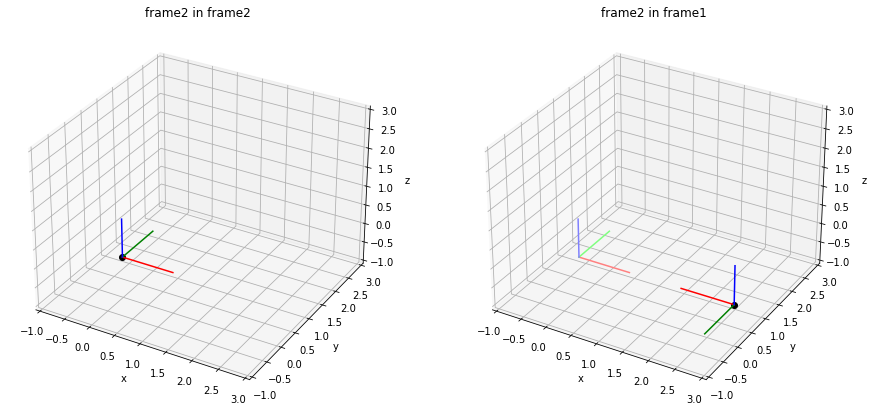

In [3]:
# 지역 좌표계2
X = [1, 0 ,0, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
Y = [0, 1, 0, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
Z = [0, 0, 1, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
XYZ_2 = np.stack([X,Y,Z], axis=-1)
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 좌표계 그리기
# - 2번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 그대로 그려짐
_X, _Y, _Z = XYZ_2[:3,0], XYZ_2[:3,1], XYZ_2[:3,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame2 in frame2")

# 변환 행렬 생성
R_12 = Rot_zyx(np.deg2rad(180), 0, 0)  # z 축으로 180도 회전하는 행렬
P_12 = [3, 0, 0] # x 축으로 3 미터 이동
T_12 = SE3(R_12, P_12)

# 변환 행렬 적용
XYZ_1 = np.matmul(T_12, XYZ_2)  # 좌표계2는 좌표계1기준에서는 R_12 만큼 회전되었음

# 좌표계 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
sub = fig.add_subplot(1, 2, 2, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_1[:3,0], XYZ_1[:3,1], XYZ_1[:3,2]
scatter_3d([P_12], 'ko', sub=sub, fig=fig)  # 좌표계1에서 본 좌표계2 원점 (P_12)
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame2 in frame1")

### 여러 좌표값 동시 변환

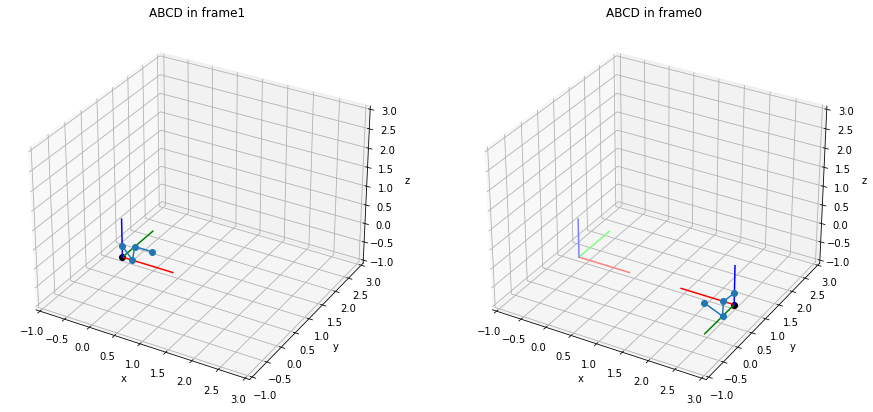

In [4]:
# 2번 좌표계에서의 A,B,C,D 점 좌표
A_2 = [0, 0 ,0.3, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
B_2 = [0.2, 0, 0, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
C_2 = [0, 0.4, 0, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
D_2 = [0.4, 0.3, 0.1, 1]  # Homogenous coordinate으로 표현하기 위해 뒤에 1 추가
ABCD_2 = np.stack([A_2,B_2,C_2,D_2], axis=-1)
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 2번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_2[:3,0], XYZ_2[:3,1], XYZ_2[:3,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_2[:3,:].transpose(), '-o', sub=sub, fig=fig)  # 2번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("ABCD in frame1")

# 2번 좌표계의 ABCD를 1번 좌표계로 회전
ABCD_1 = np.matmul(T_12, ABCD_2)

sub = fig.add_subplot(1, 2, 2, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

# 1번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_1[:3,0], XYZ_1[:3,1], XYZ_1[:3,2]
scatter_3d([P_12], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1[:3,:].transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("ABCD in frame0")

### 임의의 좌표계 변환 적용해보기

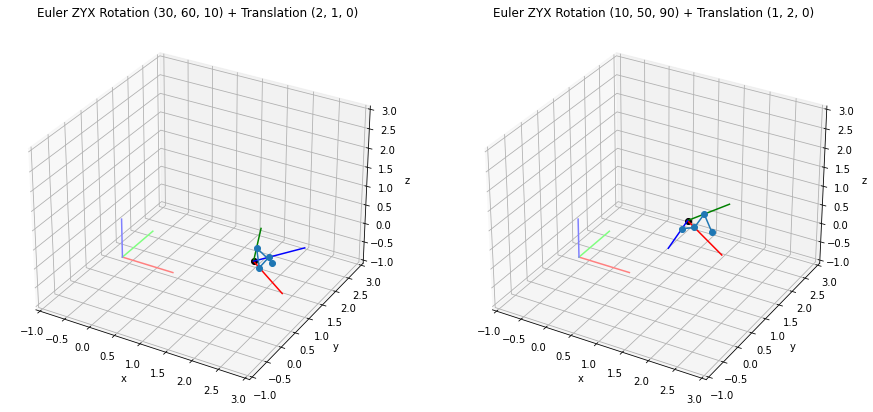

In [5]:
fig = plt.figure(figsize=(15, 15))

# 임의의 변환 행렬
R_12 = Rot_zyx(np.deg2rad(30), np.deg2rad(60), np.deg2rad(10))
P_12 = [2, 1, 0]
T_12 = SE3(R_12, P_12)

# 회전 행렬 적용
XYZ_1 = np.matmul(T_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(T_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 1, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_1[:3,0], XYZ_1[:3,1], XYZ_1[:3,2]
scatter_3d([P_12], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1[:3,:].transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("Euler ZYX Rotation (30, 60, 10) + Translation (2, 1, 0)")

# 임의의 변환 행렬
R_12 = Rot_zyx(np.deg2rad(10), np.deg2rad(50), np.deg2rad(90))
P_12 = [1, 2, 0]
T_12 = SE3(R_12, P_12)

# 회전 행렬 적용
XYZ_1 = np.matmul(T_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(T_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 2, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_1[:3,0], XYZ_1[:3,1], XYZ_1[:3,2]
scatter_3d([P_12], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1[:3,:].transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("Euler ZYX Rotation (10, 50, 90) + Translation (1, 2, 0)")

## 3. 변환 행렬의 곱셈
* 회전과 마찬가지고 좌표계 변환의 기준 등 물리적 의미를 생각해야 함
* 두번의 좌표계 변환을 더한다면, 좌표계를 2->1, 1->0 으로 두번 옮기는 것으로 생각
    * 매 변환에서 변환 축은 옮겨지는 목표 좌표계를 기준으로 함
* 변환의 더함은 회전 행렬의 곱셈으로 표현 가능
```python
T_02 = T_01 * T_12
```

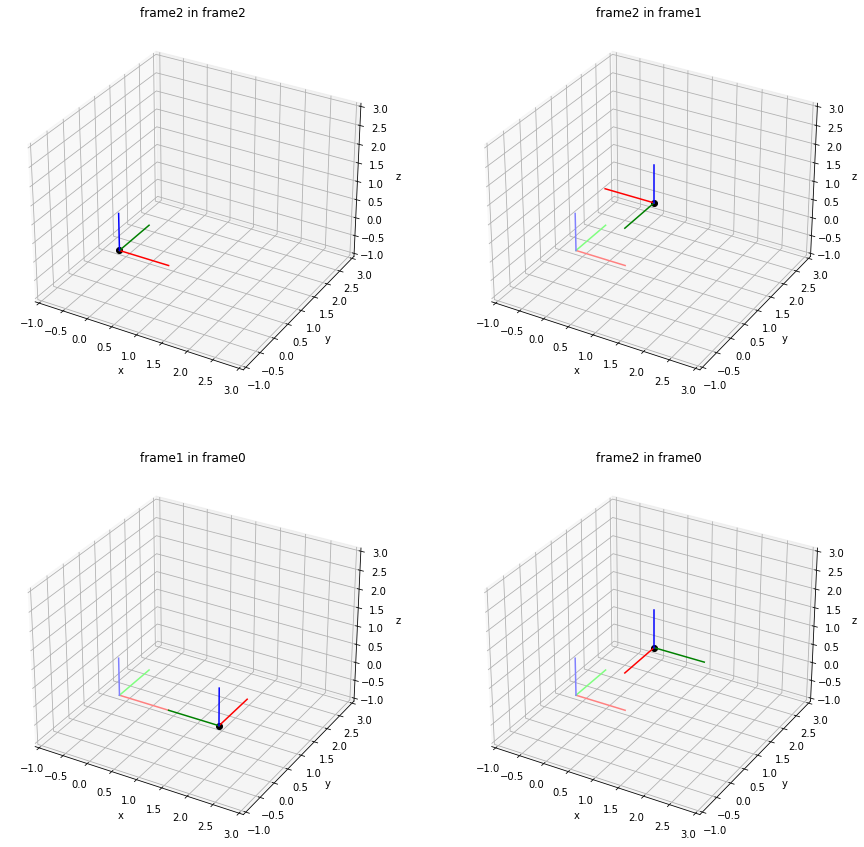

In [6]:
# 좌표계2는 좌표계1로부터 z 축으로 180도 회전
R_12 = Rot_zyx(np.deg2rad(180), 0, 0)  # z 축으로 180도 회전하는 행렬
P_12 = [1, 1, 1]
T_12 = SE3(R_12, P_12)

# 좌표계1은 좌표계0으로부터 z 축으로 90도 회전
R_01 = Rot_zyx(np.deg2rad(90), 0, 0)  # z 축으로 90도 회전하는 행렬
P_01 = [2, 0, 0]
T_01 = SE3(R_01, P_01)

# 지역 좌표계2
X = [1, 0 ,0, 1]
Y = [0, 1, 0, 1]
Z = [0, 0, 1, 1]
XYZ = np.stack([X,Y,Z], axis=-1)
XYZ_22 = XYZ  # 좌표계2에서 본 좌표계2의 XYZ는 변형 없이 그대로임
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 좌표계2에서 좌표계2 그리기
# - 2번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 그대로 그려짐
_X, _Y, _Z = XYZ_22[:3,0], XYZ_22[:3,1], XYZ_22[:3,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(2, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame2 in frame2")

# 회전 행렬 적용
XYZ_12 = np.matmul(T_12, XYZ_22)  # 좌표계2를 좌표계1에서 표현하기 위해 R_12 만큼 회전 적용

# 좌표계1에서 좌표계2 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
sub = fig.add_subplot(2, 2, 2, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_12[:3,0], XYZ_12[:3,1], XYZ_12[:3,2]
scatter_3d([P_12], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame2 in frame1")

# 회전 행렬 적용
XYZ_01 = np.matmul(T_01, XYZ)  # 좌표계1을 좌표계0에서 표현하기 위해 R_01 만큼 회전 적용

# 좌표계0에서 좌표계1 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
sub = fig.add_subplot(2, 2, 3, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_01[:3,0], XYZ_01[:3,1], XYZ_01[:3,2]
scatter_3d([P_01], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_01, _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([P_01, _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([P_01, _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame1 in frame0")

# 회전 행렬 적용
T_02 = np.matmul(T_01, T_12)  # 0에서 2로 가는 회전은 R_01과 R_12의 곱
P_02 = T_02[:3,3]
XYZ_0 = np.matmul(T_02, XYZ_22)  # 좌표계2는 좌표계1기준에서는 R_12 만큼 회전되었음

# 좌표계0에서 좌표계2 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
sub = fig.add_subplot(2, 2, 4, projection="3d")

scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

_X, _Y, _Z = XYZ_0[:3,0], XYZ_0[:3,1], XYZ_0[:3,2]
scatter_3d([P_02], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_02, _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([P_02, _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([P_02, _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("frame2 in frame0")

### 임의의 복수 변환 적용해보기

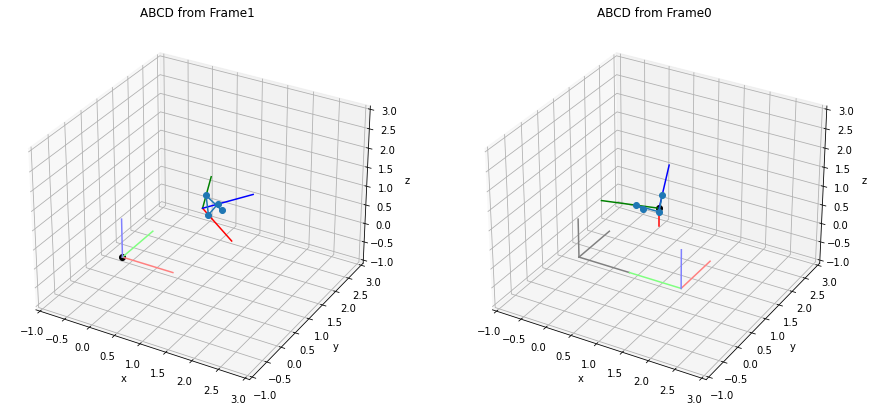

In [7]:
fig = plt.figure(figsize=(15, 15))

# 임의의 오일러 ZYX 회전 좌표계1 <- 좌표계2
R_12 = Rot_zyx(np.deg2rad(30), np.deg2rad(60), np.deg2rad(10))
P_12 = [1, 1, 1]
T_12 = SE3(R_12, P_12)

# 임의의 오일러 ZYX 회전 좌표계0 <- 좌표계1
R_01 = Rot_zyx(np.deg2rad(90), np.deg2rad(0), np.deg2rad(0))
P_01 = [2, 0, 0]
T_01 = SE3(R_01, P_01)


# 행렬곱을 이용한 0 <- 2 회전 획득
T_02 = np.matmul(T_01, T_12)
R_02 = T_02[:3,:3]  # T_02에서 R_02 추출
P_02 = T_02[:3,3]  # T_02에서 P_02 추출

# 회전 행렬 적용
XYZ_12 = np.matmul(T_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(T_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)

# 기본 좌표계 
scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

# 1번 좌표계에서 2번 좌표계 
_X, _Y, _Z = XYZ_12[:3,0], XYZ_12[:3,1], XYZ_12[:3,2]
scatter_3d(np.stack([P_12, _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([P_12, _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1[:3,:].transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("ABCD from Frame1")


# 임의의 오일러 ZYX 회전

# 회전 행렬 적용
XYZ_01 = np.matmul(T_01, XYZ)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미
XYZ_02 = np.matmul(T_02, XYZ)  # 좌표계 2는 좌표계0 기준에서는 R_02 만큼 회전되었음 의미

# 2번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_0 = np.matmul(T_02, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 2, projection="3d")
# 기본 좌표계 
scatter_3d(np.stack([[0,0,0], [1,0,0]]), '0.5', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '0.5', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '0.5', sub=sub, fig=fig)

# 0번 좌표계에서 1번 좌표계 
_X, _Y, _Z = XYZ_01[:3,0], XYZ_01[:3,1], XYZ_01[:3,2]
scatter_3d(np.stack([P_01, _X]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([P_01, _Y]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([P_01, _Z]), '#8080FF', sub=sub, fig=fig)

# 0번 좌표계에서 2번 좌표계 
_X, _Y, _Z = XYZ_02[:3,0], XYZ_02[:3,1], XYZ_02[:3,2]
scatter_3d([P_02], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([P_02, _X]), '-r', sub=sub, fig=fig)
scatter_3d(np.stack([P_02, _Y]), '-g', sub=sub, fig=fig)
scatter_3d(np.stack([P_02, _Z]), '-b', sub=sub, fig=fig)

# 0번 좌표계에서의 ABCD 그리기
scatter_3d(ABCD_0[:3,:].transpose(), '-o', sub=sub, fig=fig)  
sub.set_xlim(-1, 3)
sub.set_ylim(-1, 3)
sub.set_zlim(-1, 3)
_ = sub.set_title("ABCD from Frame0")

## 4. 변환 행렬 되돌리기
* 역행렬로 좌표계 변환을 되돌릴 수 있음
  - np.linalg.inv(R) 함수 사용
  - ***[주의사항]*** 변환 행렬의 경우 tranpose로 되돌릴 수 없음

In [8]:
print("역행렬")
print(np.round(np.linalg.inv(T_02), 3))
T_20 = np.linalg.inv(T_02)
ABCD_2_re = np.matmul(T_20, ABCD_0)
print("원래 좌표계2에서의 ABCD 값")
print(np.round(ABCD_2, 3))
print("좌표계1 값으로부터 역추정한 좌표계2에서의 ABCD 값")
print(np.round(ABCD_2_re, 3))

역행렬
[[-0.25   0.433 -0.866  0.683]
 [-0.928 -0.362  0.087  1.203]
 [-0.276  0.825  0.492 -1.042]
 [ 0.     0.     0.     1.   ]]
원래 좌표계2에서의 ABCD 값
[[0.  0.2 0.  0.4]
 [0.  0.  0.4 0.3]
 [0.3 0.  0.  0.1]
 [1.  1.  1.  1. ]]
좌표계1 값으로부터 역추정한 좌표계2에서의 ABCD 값
[[-0.   0.2 -0.   0.4]
 [ 0.   0.   0.4  0.3]
 [ 0.3  0.   0.   0.1]
 [ 1.   1.   1.   1. ]]
